<img src='https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/tools/frameworks/-/raw/main/img/Standard_banner.png' align='right' width='100%'/>

<font color="#138D75">**EUMETSAT Copernicus**</font> <br>
**Copyright:** 2025 EUMETSAT <br>
**License:** MIT <br>
**Authors:** Anna-Lena Erdmann (EUMETSAT)

<html>
  <div style="width:100%">
    <div style="float:left"><a href="https://jupyterhub.prod.wekeo2.eu/hub/user-redirect/lab/tree/public/wekeo4data/wekeo-earthkit/01_WEkEOEarthkit_Introduction.ipynb"><img src="https://img.shields.io/badge/launch-WEKEO-1a4696.svg?style=flat&logo=" alt="Open in WEkEO"></a></div>
    <div style="float:left"><p>&emsp;</p></div>
  </div>    
</html>

<div class="alert alert-block alert-success">
<h3>Earthkit WEkEO Plugins: Visualize Data with Earthkit</h3></div>

<div class="alert alert-block alert-warning">
    
<b>PREREQUISITES </b>
    
This notebook has the following prerequisites:
  - **<a href="https://my.wekeo.eu/user-registration" target="_blank">A WEkEO account</a>** if you are using or plan to use WEkEO.
  - a general understanding how data access with earthkit works (check out **<a href="https://notebooks.prod.wekeo2.eu/notebook/wekeo4data/wekeo-earthkit/01_WEkEOEarthkit_Introduction.ipynb" target="_blank"> this notebook</a>**) 
</div>
<hr>

# 1 Accessing WEkEO datasets using the Earthkit WEkEO Plugins

### Data used

| Product Description  | WEkEO HDA ID | WEkEO metadata |
|:--------------------:|:-------------:|:-----------------:|
| ERA5 monthly averaged data on single levels from 1940 to present | EO:ECMWF:DAT:REANALYSIS_ERA5_SINGLE_LEVELS_MONTHLY_MEANS | <a href="https://www.wekeo.eu/data?view=dataset&dataset=EO%3AECMWF%3ADAT%3AREANALYSIS_ERA5_SINGLE_LEVELS_MONTHLY_MEANS" target="_blank">link</a> | 
| Land Surface Temperature Daily Cycle 2017-2021 (raster 5 km), global, 10-daily - version 1  | EO:CLMS:DAT:CLMS_GLOBAL_LST_5KM_V1_10DAILY-DAILY-CYCLE_NETCDF | <a href="https://www.wekeo.eu/data?view=dataset&dataset=EO%3ACLMS%3ADAT%3ACLMS_GLOBAL_LST_5KM_V1_10DAILY-DAILY-CYCLE_NETCDF" target="_blank">link</a> |

### Learning outcomes

At the end of this notebook you will know;
* how to access datasets from different Copernicsu Services using the <font color="#138D75">**Earthkit WEkEO Plugin**</font> 
* how to visualize the datasets using <font color="#138D75">**earthkit-plots**</font> 

### Outline


EarthKit is an open-source Python project led by the European Centre for Medium-Range Weather Forecasts (ECMWF) for streamlined data access. Through the WEkEO plugin for earthkit it is now possible to acces the full range of Copernicus datasets through earthkit. Besides a harmonized data access layer, earthkit provides functionalities for plotting. This notebook shows how the plotting functions can be used for heterogenous datasets. 

<div class="alert alert-info" role="alert">

## <a id='TOC_TOP'></a>Contents

</div>
    
 1. [Installation](#section0)
 1. [Download Datasets using the Earthkit Plugin](#section1)
 1. [Data Visualization with earthkit-plots](#section2)


<hr>

<div class="alert alert-info" role="alert">

## 1. <a id='section0'></a>Installation
[Back to top](#TOC_TOP)
    
</div>


The WEkEO plugins are included in the earthkit-data package, so you will only need to download the earthkit package for running this notebook: 




In [ ]:
# ! pip install earthkit

We begin by importing all of the libraries that we need to run this notebook. If you have built your python using the environment file provided in this repository, then you should have everything you need. For more information on building environment, please see the repository **<a href="../README.md" target="_blank">README</a>**.

In [1]:
import os
import earthkit
import xarray as xr
from earthkit.data import settings, cache

<div class="alert alert-info" role="alert">

## 2. <a id='section1'></a>Download Datasets using Earthkit
[Back to top](#TOC_TOP)
    
</div>

You can activate the cache for the earthkit data access. this means that the package will notice if you access the same dataset twice and falls back to the previously downloaded one. You can either set a temporary cache, or a custom cache directory you have access to. Below we define the folder "cache" as our cache directory. 

In [2]:
s = {"cache-policy": "user",
     "user-cache-directory": "./cache"}
settings.set(s)
cache.directory()

'./cache'

The function `earthkit.data.from_source` is a function that loads the dataset from the WEkEO HDA. When first downloading a dataset, you need to configure your WEkEO username and password in the pop-up below the code cell.  

The first argument of the function is always `wekeo-source` for the downloads of WEkEO datasets. The second argument is the request for the WEkEO HDA. You can reuse requests from the past of get the API request in the <a href="https://wekeo.copernicus.eu/data?view=viewer" target="_blank">WEkEO Viewer</a>

In [7]:
%%time

ds_era5 = earthkit.data.from_source("wekeo-source", {
  "dataset_id": "EO:ECMWF:DAT:REANALYSIS_ERA5_SINGLE_LEVELS_MONTHLY_MEANS",
  "product_type": ["monthly_averaged_reanalysis_by_hour_of_day"],
  "variable": ["2m_temperature"],
  "year": ["2020"],
  "month": ["07"],
  "time": ["00:00","01:00","02:00","03:00","04:00","05:00",
            "06:00","07:00","08:00","09:00","10:00","11:00",
            "12:00","13:00","14:00","15:00","16:00","17:00",
            "18:00","19:00","20:00","21:00","22:00","23:00"],
  "data_format": "netcdf",
  "download_format": "zip",
  "itemsPerPage": 200,
  "startIndex": 0
})


CPU times: total: 31.2 ms
Wall time: 26.4 ms


In [6]:
ds_clms = earthkit.data.from_source("wekeo-source", {
  "dataset_id": "EO:CLMS:DAT:CLMS_GLOBAL_LST_5KM_V1_10DAILY-DAILY-CYCLE_NETCDF",
  "productType": "LST10",
  "resolution": "5000",
  "startdate": "2020-07-01T00:00:00.000Z",
  "enddate": "2020-07-02T23:59:59.999Z",
  "itemsPerPage": 200,
  "startIndex": 0
} )


Let's examine what earthkit has downloaded: 

In [12]:
ds_era5.ls()

,variable,level,valid_datetime,units
0,t2m,None,2020-07-01T00:00:00,K
1,t2m,None,2020-07-01T01:00:00,K
2,t2m,None,2020-07-01T02:00:00,K
3,t2m,None,2020-07-01T03:00:00,K
4,t2m,None,2020-07-01T04:00:00,K
5,t2m,None,2020-07-01T05:00:00,K
6,t2m,None,2020-07-01T06:00:00,K
7,t2m,None,2020-07-01T07:00:00,K
8,t2m,None,2020-07-01T08:00:00,K
9,t2m,None,2020-07-01T09:00:00,K


We can see that there is one record of air temperature for each hour of the day for the ERA 5 dataset. 

In [16]:
ds_clms.ls()

,variable,level,valid_datetime,units
0,FRAC_VALID_OBS,None,2020-07-01T00:00:00,None
1,FRAC_VALID_OBS,None,2020-07-01T01:00:00,None
2,FRAC_VALID_OBS,None,2020-07-01T02:00:00,None
3,FRAC_VALID_OBS,None,2020-07-01T03:00:00,None
4,FRAC_VALID_OBS,None,2020-07-01T04:00:00,None
...,...,...,...,...
91,MIN,None,2020-07-01T19:00:00,Kelvin
92,MIN,None,2020-07-01T20:00:00,Kelvin
93,MIN,None,2020-07-01T21:00:00,Kelvin
94,MIN,None,2020-07-01T22:00:00,Kelvin


For the CLMS dataset it is a bit more difficult: Because there is more than one variable inside the dataset we have four different records for each hour of the day.

To get a better understanding we can loas the data into an xarray to see the different variable names. 

In [10]:
lst = ds_clms.to_xarray()
lst

<xarray.Dataset> Size: 22GB
Dimensions:         (time: 24, lat: 3584, lon: 8064)
Coordinates:
  * lat             (lat) float64 29kB 80.0 79.96 79.91 ... -79.87 -79.91 -79.96
  * lon             (lon) float64 65kB -180.0 -180.0 -179.9 ... 179.9 180.0
  * time            (time) datetime64[ns] 192B 2020-07-01 ... 2020-07-01T23:0...
Data variables:
    FRAC_VALID_OBS  (time, lat, lon) float64 6GB dask.array<chunksize=(1, 200, 200), meta=np.ndarray>
    MAX             (time, lat, lon) float64 6GB dask.array<chunksize=(1, 200, 200), meta=np.ndarray>
    MEDIAN          (time, lat, lon) float64 6GB dask.array<chunksize=(1, 200, 200), meta=np.ndarray>
    MIN             (time, lat, lon) float64 6GB dask.array<chunksize=(1, 200, 200), meta=np.ndarray>
    crs             |S1 1B ...
Attributes: (12/31)
    Conventions:                CF-1.6
    algorithm_version:          V1.2.1
    archive_facility:           VITO
    comment:                    10-day Daily Cycle Land Surface Temperature (...
    copyright:                  Copernicus Service Information 2020
    credit:                     LST10-DC products are generated by the global...
    ...                         ...
    identifier:                 urn:cgls:global:lst10-dc_v1_0.045degree:LST10...
    references:                 https://land.copernicus.eu/global/products/lst
    platform:                   GOES, MSG, HIMAWARI
    sensor:                     ABI, SEVIRI, AHI
    product_version:            V1.2.1
    contacts:                   https://land.copernicus.eu/global/contact

<div class="alert alert-info" role="alert">

## 3. <a id='section2'></a>Data Visualization with earthkit-plots
[Back to top](#TOC_TOP)
    
</div>

The following sections introduces ways to plot the data we got from the HDA. Depending on the type of data, there are different plotting capabilities available in earthkit. For a full overview, please refer to the **<a href="https://earthkit-plots.readthedocs.io/en/latest/index.html" target="_blank">earthkit-plots documentation</a>**  

### 3.1 Plotting two different datasets side by side for the same geographical region

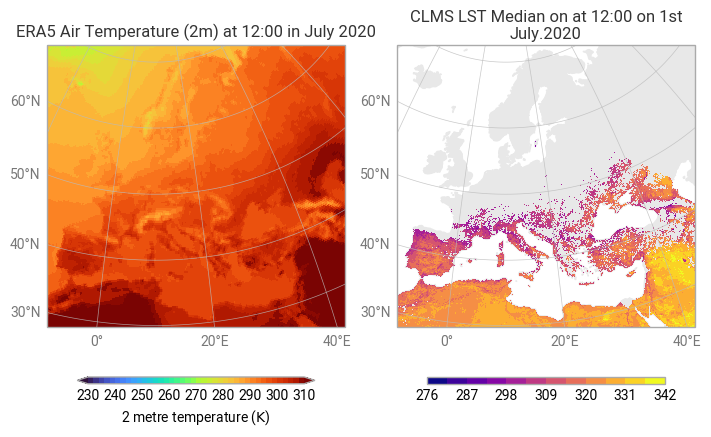

In [19]:
figure = earthkit.plots.Figure(rows=1, columns=2)

dt_map = figure.add_map(domain="Europe")
dt_map.plot(ds_era5[11], units="kelvin")
dt_map.legend(location="bottom")
dt_map.title("ERA5 Air Temperature (2m) at 12:00 in July 2020")


eum_map = figure.add_map(domain="Europe")
eum_map.plot(ds_clms[59], units="kelvin")
eum_map.legend(location="bottom")
eum_map.title("CLMS LST Median on at 12:00 on 1st July.2020")

figure.land()
figure.gridlines()

figure.show()


### 3.2 Plotting two different datasets side by side for different geographical regions

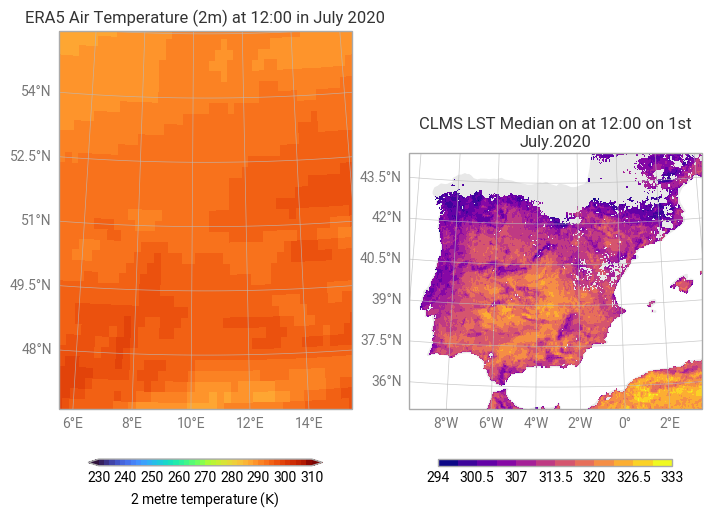

In [53]:
figure = earthkit.plots.Figure(rows=1, columns=2)

dt_map = figure.add_map(domain="Germany")
dt_map.plot(ds_era5[11], units="kelvin")
dt_map.legend(location="bottom")
dt_map.title("ERA5 Air Temperature (2m) at 12:00 in July 2020")


eum_map = figure.add_map(domain="Spain")
eum_map.plot(ds_clms[59], units="kelvin")
eum_map.legend(location="bottom")
eum_map.title("CLMS LST Median on at 12:00 on 1st July.2020")

figure.land()
figure.gridlines()

figure.show()


### 3.3 Plot each record of a dataset in a subplot 

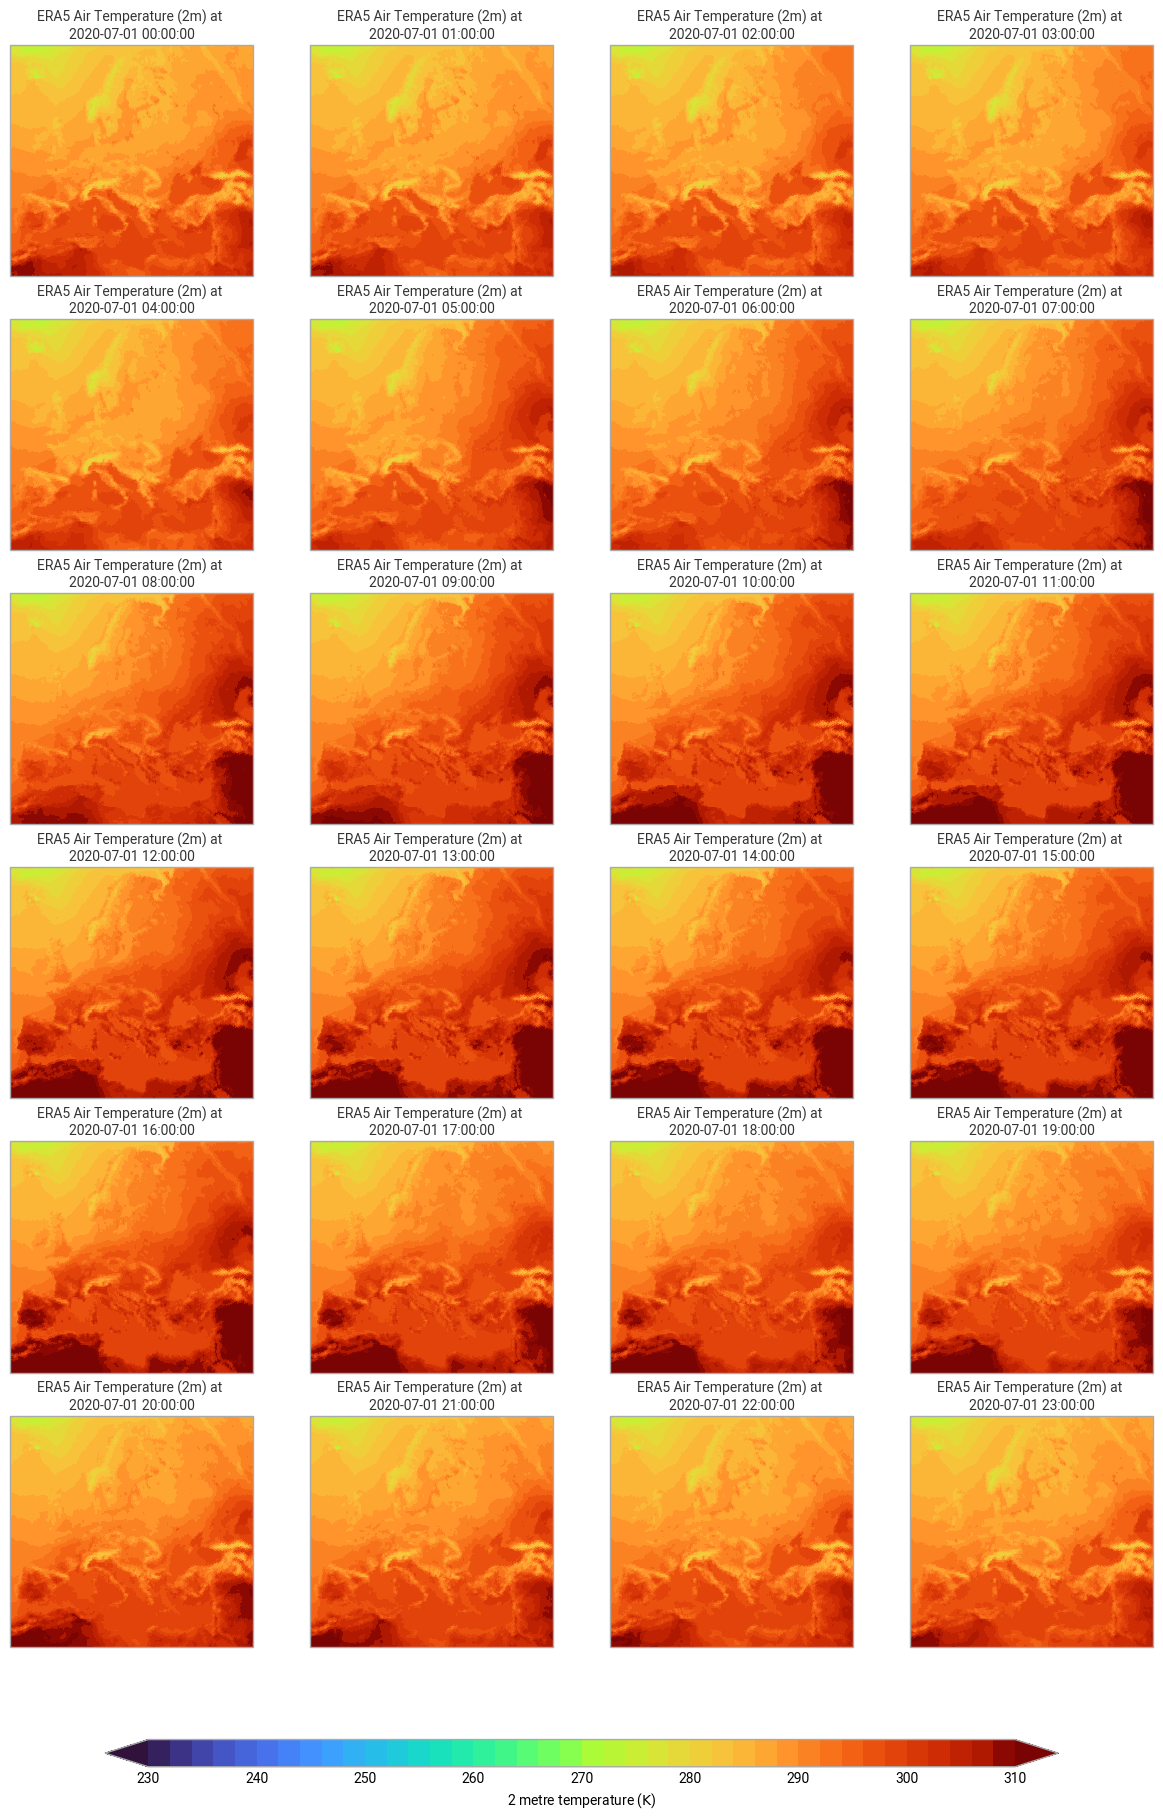

In [52]:
figure = earthkit.plots.Figure(size=(12, 18), rows=6, columns=4)


for i in range(len(ds_era5.ls())):
    dt_map = figure.add_map(domain="Europe")
    dt_map.plot(ds_era5[i], units="kelvin")
    date = str(ds_era5[i].slices[0].value.strftime("%Y-%m-%d %H:%M:%S"))
    dt_map.title("ERA5 Air Temperature (2m) at \n"+date, fontsize=10)
figure.legend(location="bottom")

<hr>
<div class="alert alert-info" role="alert">

## <a id='section3'></a>Next Steps
[Back to top](#TOC_TOP)

</div>

<font color="#138D75">**Congratulations, you have downloaded and visualized different Copernicus datasets!**</font>

As a next step you can check out the **xCube Viewer** tutorials and notebooks to explore how you can visualize datacubes such as the one created in a graphical User interface and share it with others through a virtual machine. 

For more information on the Earthkit WEkEO Plugin, take a look at the documentation (<a href="https://earthkit-data.readthedocs.io/en/latest/examples/wekeo.html#" target="_blank">Documentation</a>). 

Other notebooks on the use of Earthkit with WEkEO datasets will follow soon and will be available in the <a href="https://notebooks.prod.wekeo2.eu/" target="_blank">Jupyter Catalogue</a>. In the meantime, check out the remaining notebooks in the <a href="https://notebooks.prod.wekeo2.eu/" target="_blank">Jupyter Catalogue</a> to get a feel on the many different datasets you can find on WEkEO, of which many can be now accessed through the Earthkit Plugin!

